# Preprocessing

### Load all climate data (Precip & Soil Moisture) station F102 - F108

In [8]:
%run -i function.py


In [25]:
# Load the excel sheet
df_station = pd.read_excel(os.getcwd()+"/Inputs/Physiography Data.xlsx",
                            engine="openpyxl", sheet_name=[1,2],skiprows=1)
                            
# Print the name of each sheets
pprint.pprint(df_station.keys(),)


dict_keys([1, 2])


In [26]:
for i in df_station:
    print(i)

1
2


## Load all the depth from each station into a group dataframe


In [48]:
# Access the first weather station
# Rename the column as the first row and reindex
df_station["F102"].columns = df_station["F102"].iloc[0]
df = df_station["F102"].iloc[1:]
# Set the Date column to the index
df = df.set_index("Date")
df


KeyError: "None of ['Date'] are in the columns"

## Check the lenght of the data obtained from all stations

In [4]:
df = df.rename(columns={"mm": "PRCP (mm)", "5 cm": "SM 5 (cm)",
                        "25 cm": "SM 25 (cm)", "45 cm": "SM 45 (cm)"})


In [ ]:
### Load the temperature data

In [5]:
# Obtain the Mesonet Temperature Min and Max temperature
Temperature = df_station["MESONET HINT_TEMP"].set_index('Date')
#Temperature.rename(columns={"TMAX (C)" : "TMAX ", 'TMIN (C)': "TMAX"})


The lenghths of the dataframes are the same length, Do a check with date_Range method 

In [6]:
pd.date_range('07/01/2005', '12/31/2020')


DatetimeIndex(['2005-07-01', '2005-07-02', '2005-07-03', '2005-07-04',
               '2005-07-05', '2005-07-06', '2005-07-07', '2005-07-08',
               '2005-07-09', '2005-07-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=5663, freq='D')

In [7]:
# Merge the Precipitation, Soil moisture and Temperature
df = Temperature.merge(df, how='inner', on='Date')


COrrelation between the stations at differnet depth

### Deal with the missing values across all station.

The first 60 rows contain -998 as the value and are dropped.

In [8]:
df.where((df.iloc[:] == -998)).count()


TMAX (C)       0
TMIN (C)       0
PRCP (mm)      0
SM 5 (cm)     60
SM 25 (cm)    60
SM 45 (cm)    60
dtype: int64

In [9]:
df.head(9)


,TMAX (C),TMIN (C),PRCP (mm),SM 5 (cm),SM 25 (cm),SM 45 (cm)
Date,,,,,,
2005-07-01,29.260818,19.538694,4.57,-998,-998,-998
2005-07-02,32.227455,20.372018,1.27,-998,-998,-998
2005-07-03,37.288516,20.388685,0,-998,-998,-998
2005-07-04,29.977478,17.677601,10.92,-998,-998,-998
2005-07-05,28.427494,18.849812,0,-998,-998,-998
2005-07-06,30.449696,20.660905,0,-998,-998,-998
2005-07-07,29.221930,20.472017,0,-998,-998,-998
2005-07-08,32.299677,18.172041,0,-998,-998,-998
2005-07-09,32.571897,19.222030,0,-998,-998,-998


In [10]:
df = df.iloc[60:, :]
df


,TMAX (C),TMIN (C),PRCP (mm),SM 5 (cm),SM 25 (cm),SM 45 (cm)
Date,,,,,,
2005-08-30,31.838570,17.949821,0,0.27,0.32,0.32
2005-08-31,33.071891,17.849822,0,0.26,0.32,0.32
2005-09-01,33.099669,17.777600,0,0.25,0.32,0.31
2005-09-02,34.410767,17.627602,0,0.25,0.31,0.31
2005-09-03,32.371899,20.560906,0,0.24,0.31,0.31
...,...,...,...,...,...,...
2020-12-27,17.538714,1.905536,0,0.23,0.25,0.15
2020-12-28,5.977718,1.688872,0,0.23,0.25,0.15
2020-12-29,14.038749,1.861093,22.1,0.24,0.25,0.15


### Vizualize the missing values occurance for each feature

There exisit other missing values tagged as -996, we shall change to nan and vizualize the occurances with each other 

In [11]:
df.where(df == -996).count()


TMAX (C)        0
TMIN (C)        0
PRCP (mm)      47
SM 5 (cm)      74
SM 25 (cm)    119
SM 45 (cm)     73
dtype: int64

In [12]:
df = df.replace([-996, -999], np.nan)


In [13]:
status(df)


+------------+--------------+---------------+------------+
|  Features  | Observations | No of missing | % Missing  |
+------------+--------------+---------------+------------+
|  TMAX (C)  |     5603     |       0       |    0.0%    |
|  TMIN (C)  |     5603     |       0       |    0.0%    |
| PRCP (mm)  |     5603     |      47       |    0.8%    |
| SM 5 (cm)  |     5603     |      96       |    1.7%    |
| SM 25 (cm) |     5603     |      125      |    2.2%    |
| SM 45 (cm) |     5603     |      81       |    1.4%    |
+------------+--------------+---------------+------------+


In [14]:
df = df.replace(-571.105400, np.nan)


<AxesSubplot:ylabel='Date'>

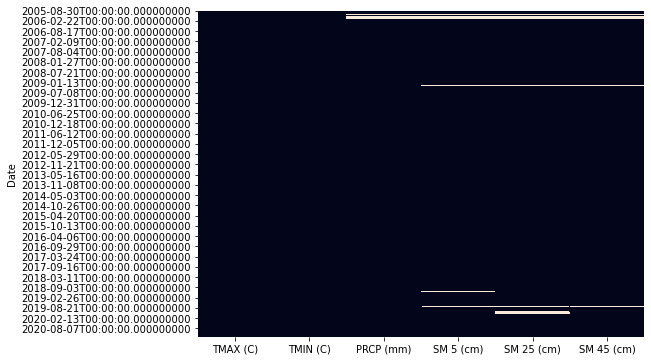

In [15]:
plt.subplots(figsize=(8, 6))
sns.heatmap(df.isna(), cbar=False)
# imporve this picture.


# AI

In [16]:
df_AI = df.interpolate(method='linear', limit_direction='both')


In [17]:
status(df_AI)


+------------+--------------+---------------+------------+
|  Features  | Observations | No of missing | % Missing  |
+------------+--------------+---------------+------------+
|  TMAX (C)  |     5603     |       0       |    0.0%    |
|  TMIN (C)  |     5603     |       0       |    0.0%    |
| PRCP (mm)  |     5603     |       0       |    0.0%    |
| SM 5 (cm)  |     5603     |       0       |    0.0%    |
| SM 25 (cm) |     5603     |       0       |    0.0%    |
| SM 45 (cm) |     5603     |       0       |    0.0%    |
+------------+--------------+---------------+------------+


- merge the soil moisture with the climatic data
- split in training and testing
- Pipeline Perfomance 
- use the model to predict missing values

## Correlation plots

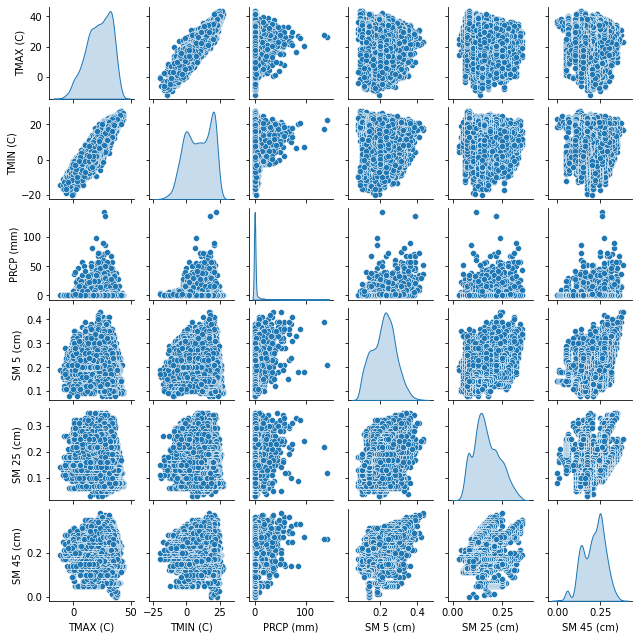

In [18]:
sns.pairplot(df_AI, diag_kind='kde', height=1.5)


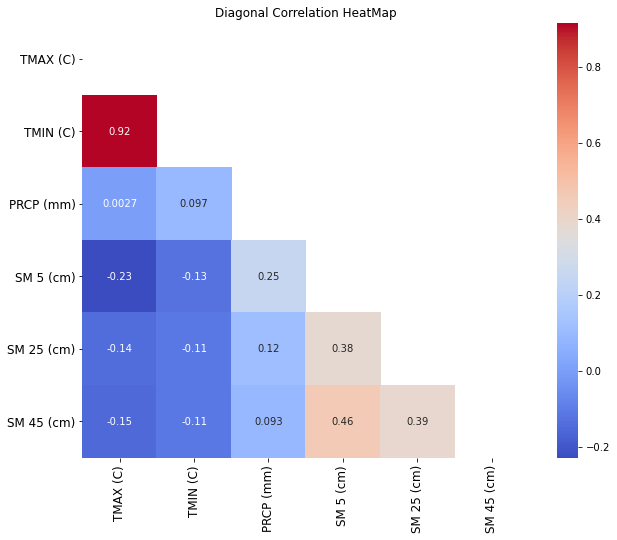

In [19]:
import matplotlib.pyplot as plt


def corr_plot(df):
    f, ax = plt.subplots(figsize=(10, 8))

    corr = df.corr()
    mask = np.zeros_like(corr, dtype=None)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, cmap='coolwarm', mask=mask, annot=True, )

    plt.title("Diagonal Correlation HeatMap")
    plt.xticks(fontsize=12, rotation=90)
    plt.yticks(fontsize=12, rotation=0)
    plt.show()


corr_plot(df_AI)


### resample to weekly values and check correlation


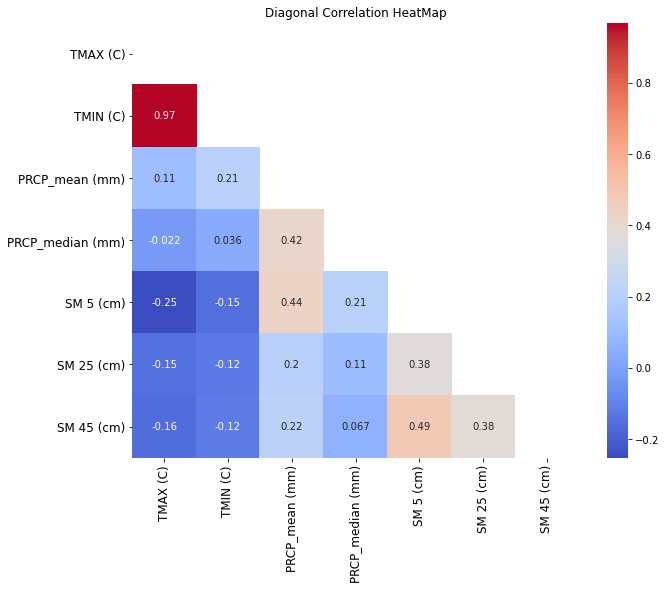

In [20]:
# Resample the temperature
resampled = df_AI[['TMAX (C)', "TMIN (C)"]].resample('W').mean()
# Resample the Precipitation mean and median
resampled["PRCP_mean (mm)"] = df_AI["PRCP (mm)"].resample('W').mean()
resampled["PRCP_median (mm)"] = df_AI["PRCP (mm)"].resample('W').median()
resampled_SM = df_AI.iloc[:, -3:].resample('W').mean()
df_AI_resampled = resampled.merge(resampled_SM, on='Date', how="inner")


corr_plot(df_AI_resampled)


The pearson correlation shows that the resampled weekly mean PRCP (mm) correlates better with other features than the median

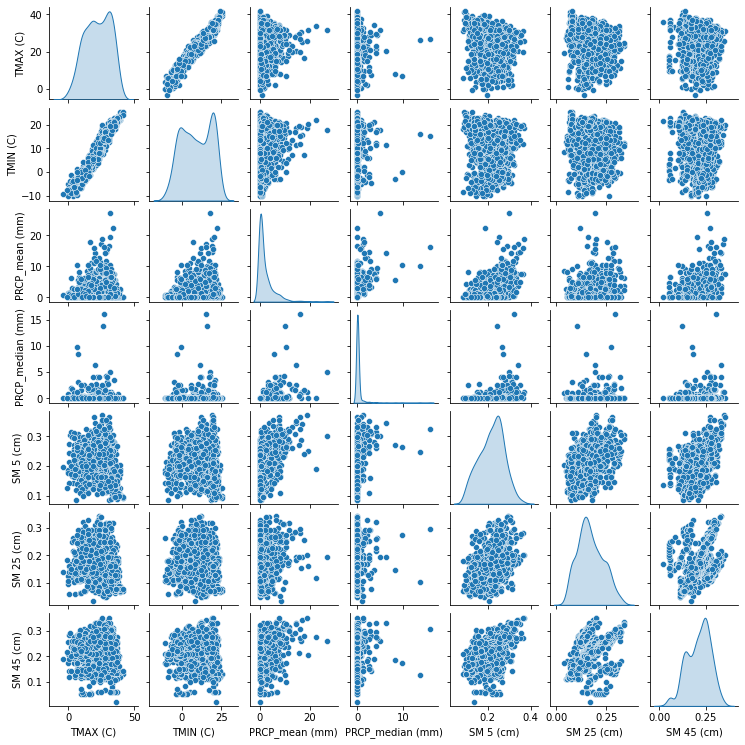

In [21]:
sns.pairplot(df_AI_resampled, diag_kind='kde', height=1.5)


# 5 CM

In [285]:
df_SM5 = df_AI_resampled.drop(columns=["PRCP_median (mm)"]).iloc[:, :-2]
df_SM5 = df_SM5.rename(columns={"PRCP_mean (mm)": "$P [mm]$",
                                "TMAX (C)": "$T_{max}$ [$^oC$]",
                                "TMIN (C)": '$T_{min}$ [$^oC$]',
                                "SM 5 (cm)": "$SM_{5} [cm]$"})


In [286]:
df_SM5['Month'] = df_SM5.index.month

# Precipitation Lags
df_SM5['$P^{lag1} (mm)$'] = df_SM5["$P [mm]$"].shift(1)
df_SM5['$P^{lag2} (mm)$'] = df_SM5["$P [mm]$"].shift(2)


# Temperature Lags
#df_SM5['$T_{max}^{lag1}$ [$^oC$]'] = df_SM5['$T_{max}$ [$^oC$]'].shift(1)
#df_SM5['$T_{max}^{lag2}$ [$^oC$]'] = df_SM5['$T_{max}$ [$^oC$]'].shift(2)

#df_SM5['$T_{min}^{lag1}$ [$^oC$]'] = df_SM5['$T_{min}$ [$^oC$]'].shift(1)
#df_SM5['$T_{min}^{lag2}$ [$^oC$]'] = df_SM5['$T_{min}$ [$^oC$]'].shift(2)

# Soil Moisture Lags

df_SM5["$SM_{5}^{lag1}[cm]$"] = df_SM5["$SM_{5} [cm]$"].shift(1)
df_SM5["$SM_{5}^{lag2}[cm]$"] = df_SM5["$SM_{5} [cm]$"].shift(2)


In [287]:
prcp = df_SM5.loc[:, df_SM5.columns.str.startswith('$P')]
temp = df_SM5.loc[:, df_SM5.columns.str.startswith('$T')]
sm = df_SM5.loc[:, df_SM5.columns.str.startswith('$S')]


df_SM5 = temp.merge(prcp, on='Date').merge(sm, on="Date").dropna()


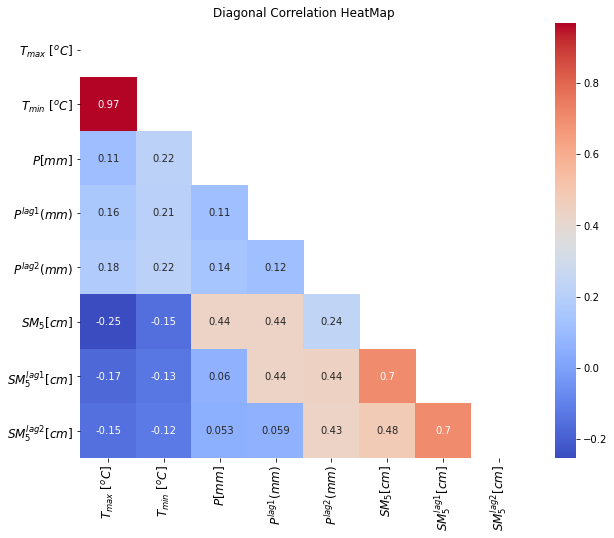

In [288]:
corr_plot(df_SM5)


## Build Model Pipeline

In [289]:
X = df_SM5.drop(columns="$SM_{5} [cm]$").values
y = df_SM5["$SM_{5} [cm]$"].values.ravel()


X_train, X_test, y_train, y_test = train_test_split(
    X, y.ravel(), test_size=0.2)

pipeline_RF = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipelines = [pipeline_RF, pipeline_XGB, pipeline_ExTree]


model = pipeline_RF.fit(X_train, y_train)


In [290]:
def results(x, y, x_t, y_t, pipelines):
    table = PrettyTable()

    # Fit the pipelines
    [pipe.fit(x, y) for pipe in pipelines]

    pipe_dict = {0: 'RandomForest', 1: 'XGBoost', 2: 'ExtraTree'}

    results = [[pipe_dict[i],
                np.round(r2_score(y, model.predict(x)), decimals=2),
                np.round(mean_squared_error(y, model.predict(x)), decimals=2)]
               for i, model in enumerate(pipelines)]
    table.title = 'Training set Score'
    table.field_names = ['Algorithm', 'R-square', 'MSE']
    table.add_rows(results)
    print(table)

    table = PrettyTable()

    #################################################################################################
    # Make predictions on testing data and test model accuracy
    #################################################################################################
    results2 = []
    model_results = {}
    i = 0
    count = 0
    for model in pipelines:
        history = np.empty(len(x_t))
        test_X = x_t[0].reshape(1, -1)
        history[0] = model.predict(test_X)

        for i in range(len(x_t)):

            x_t[i+1][-2] = history[i]
            x_t[i+1][-1] = x_t[i][-2]

            test_X = x_t[i+1].reshape(1, -1)
            history[i+1] = model.predict(test_X)
            i = i+1
            if i == (len(x_t)-1):
                break
        results2.append([model.steps[0][0],
                         np.round(
                             r2_score(np.sort(y_t), np.sort(history)), decimals=2),
                         np.round(np.sqrt(mean_squared_error(np.sort(y_t), np.sort(history))), decimals=2)])
        model_results[model.steps[0][0]] = history
        count = count + 1

    table.title = 'Test set Score'
    table.field_names = ['Algorithm', 'R-square', 'RMSE']

    table.add_rows(results2)

    print(table)

    return model_results


In [291]:
holdem = results(X_train, y_train, X_test, y_test, pipelines)


+-------------------------------+
|       Training set Score      |
+--------------+----------+-----+
|  Algorithm   | R-square | MSE |
+--------------+----------+-----+
| RandomForest |   0.97   | 0.0 |
|   XGBoost    |   1.0    | 0.0 |
|  ExtraTree   |   1.0    | 0.0 |
+--------------+----------+-----+
+-------------------------------+
|         Test set Score        |
+--------------+----------+-----+
|  Algorithm   | R-square | MSE |
+--------------+----------+-----+
| RandomForest |   0.84   | 0.0 |
|   XGBoost    |   0.94   | 0.0 |
|  ExtraTree   |   0.84   | 0.0 |
+--------------+----------+-----+


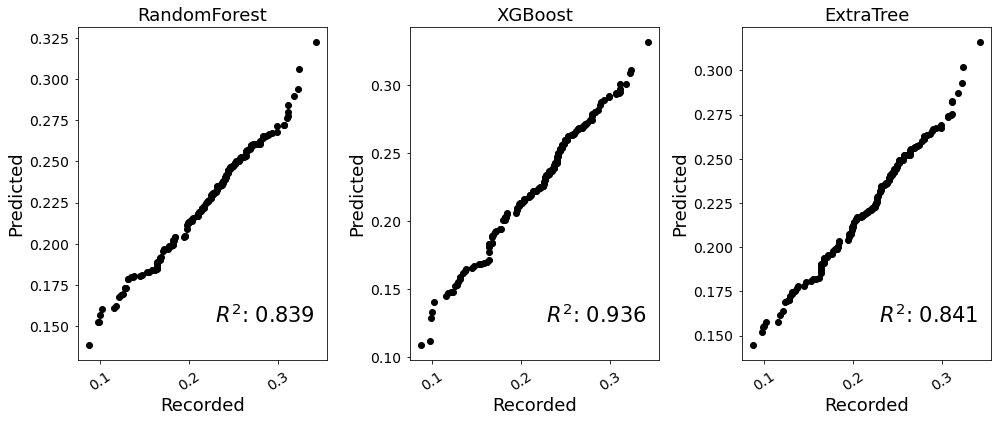

In [292]:
fig, ax = plt.subplots(1, 3, figsize=(14, 6))
# ###################################################################################################


for count, model_name in enumerate(holdem):

    ax[count].scatter(np.sort(y_test), np.sort(holdem[model_name]),
                      marker='o', color='black')

    RSQ = np.round((r2_score(np.sort(y_test), np.sort(holdem[model_name]))), 3)

    ax[count].text(0.95, 0.1, ("$R^2$: %0.03f" % RSQ),
                   verticalalignment='bottom', horizontalalignment='right',
                   transform=ax[count].transAxes,
                   color='black', fontsize=21)

    ax[count].set_xlabel('Recorded', fontsize=18)
    ax[count].tick_params(axis="x", labelsize=14, rotation=34)
    ax[count].xaxis.set_tick_params(pad=5)
    ax[count].set_ylabel('Predicted', fontsize=18)
    ax[count].tick_params(axis="y", labelsize=14)
    ax[count].yaxis.set_tick_params(pad=5)
    ax[count].set_title(model_name, size=18)

    plt.tight_layout(pad=1.2)

plt.show()


 Xgboost gives the best results for training and test

## Shapley Analysis

In [409]:
os.getcwd()


'/home/c0d3b23ak32/Desktop/XAI/Food_Production'

In [419]:
path_to_save = os.getcwd()+r'/SM_5'
mk.dir(path_to_save)


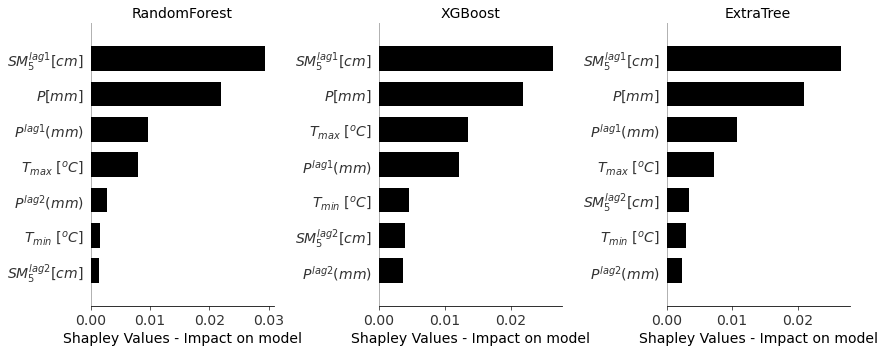

In [421]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True, figsize=(32, 5))
gs = gridspec.GridSpec(1, 3)
keep = {}
for count, model in enumerate(pipelines):
    Modeled = model[0].fit(X, y)
    explainer = shap.TreeExplainer(Modeled)
    shap_values = explainer.shap_values(X)
    ax = fig.add_subplot(gs[0, count])
    shap.summary_plot(shap_values, X, Features, show=False,
                      plot_type="bar", color="black", plot_size=(12, 5))
    plt.xlabel('Shapley Values - Impact on model', fontsize=14)
    plt.tick_params(labelsize=14)
    # plt.ylabel(labelsize=16)
    plt.tight_layout(pad=1.2)
    plt.title(model.steps[0][0], fontsize=14)
    keep[model.steps[0][0]] = shap_values
    fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()

plt.savefig(path_to_save+r'/Histogram-importance.jpg',
            format='jpeg', dpi=300, bbox_inches='tight')
plt.show()


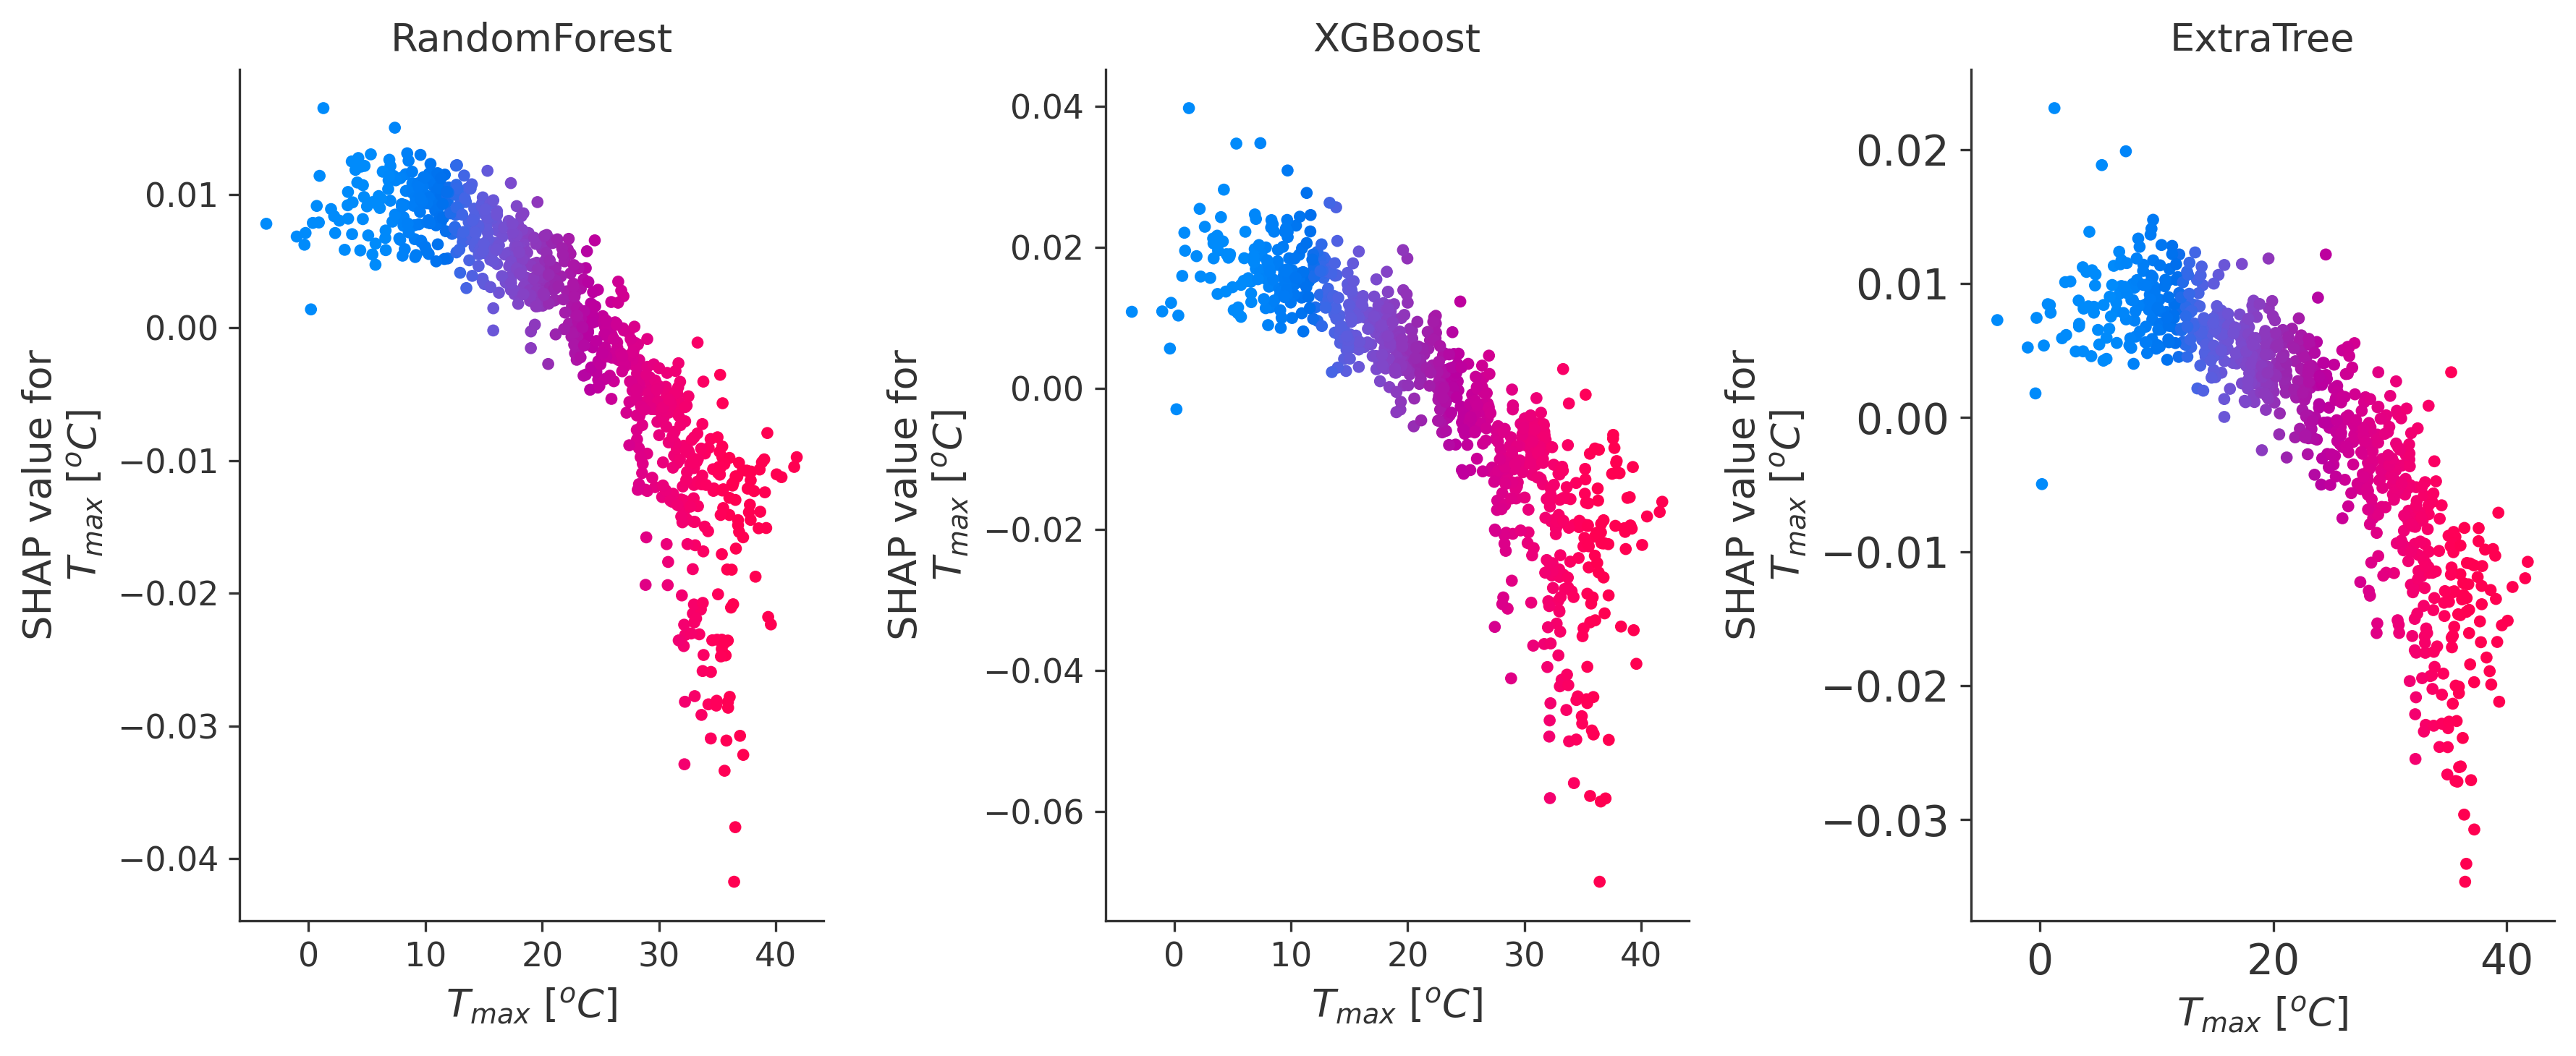

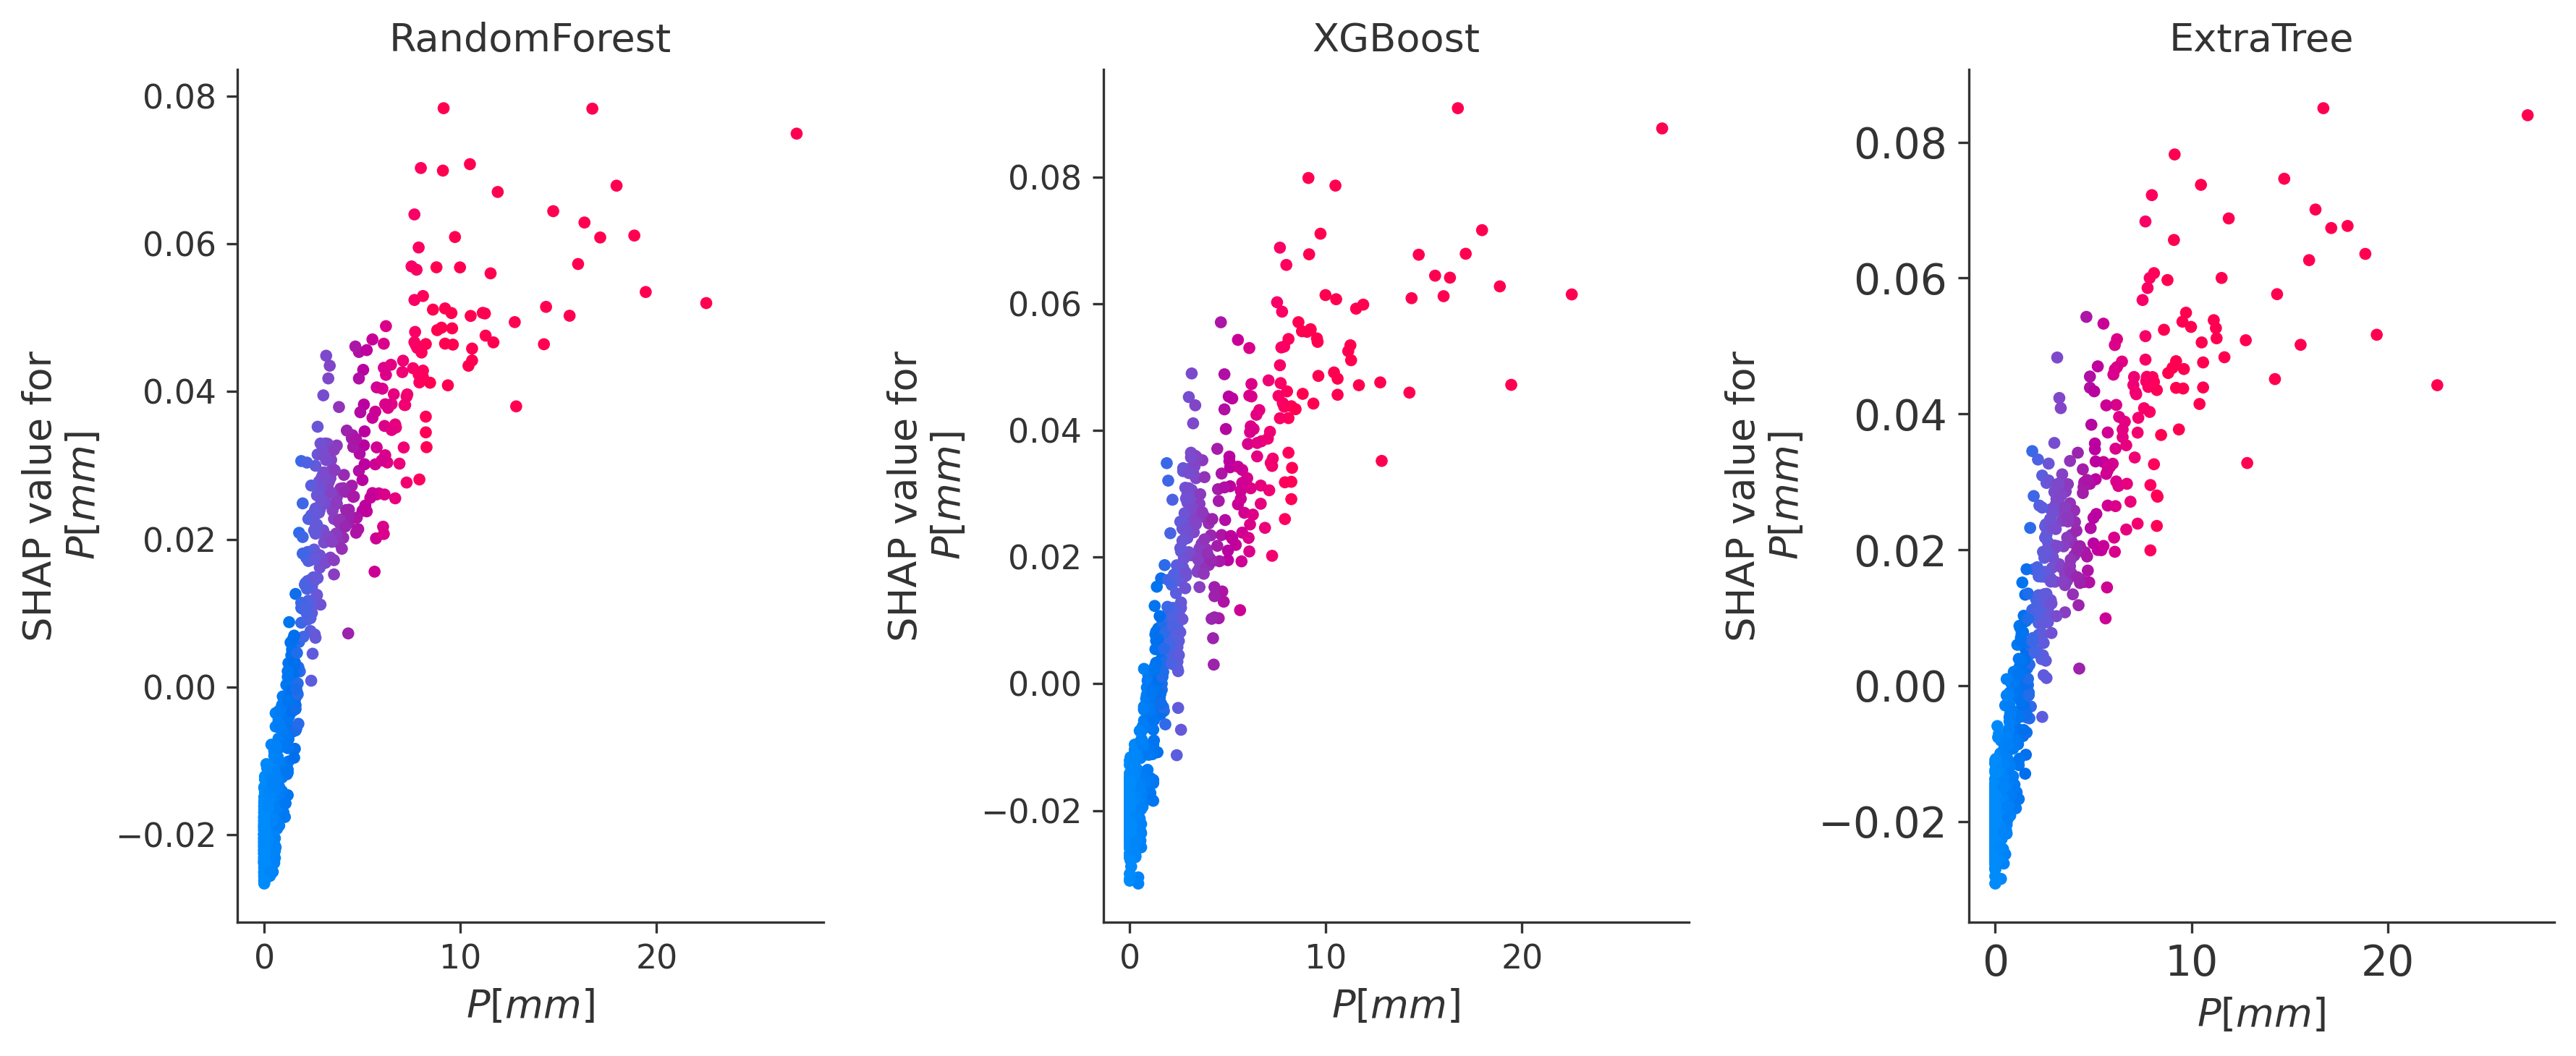

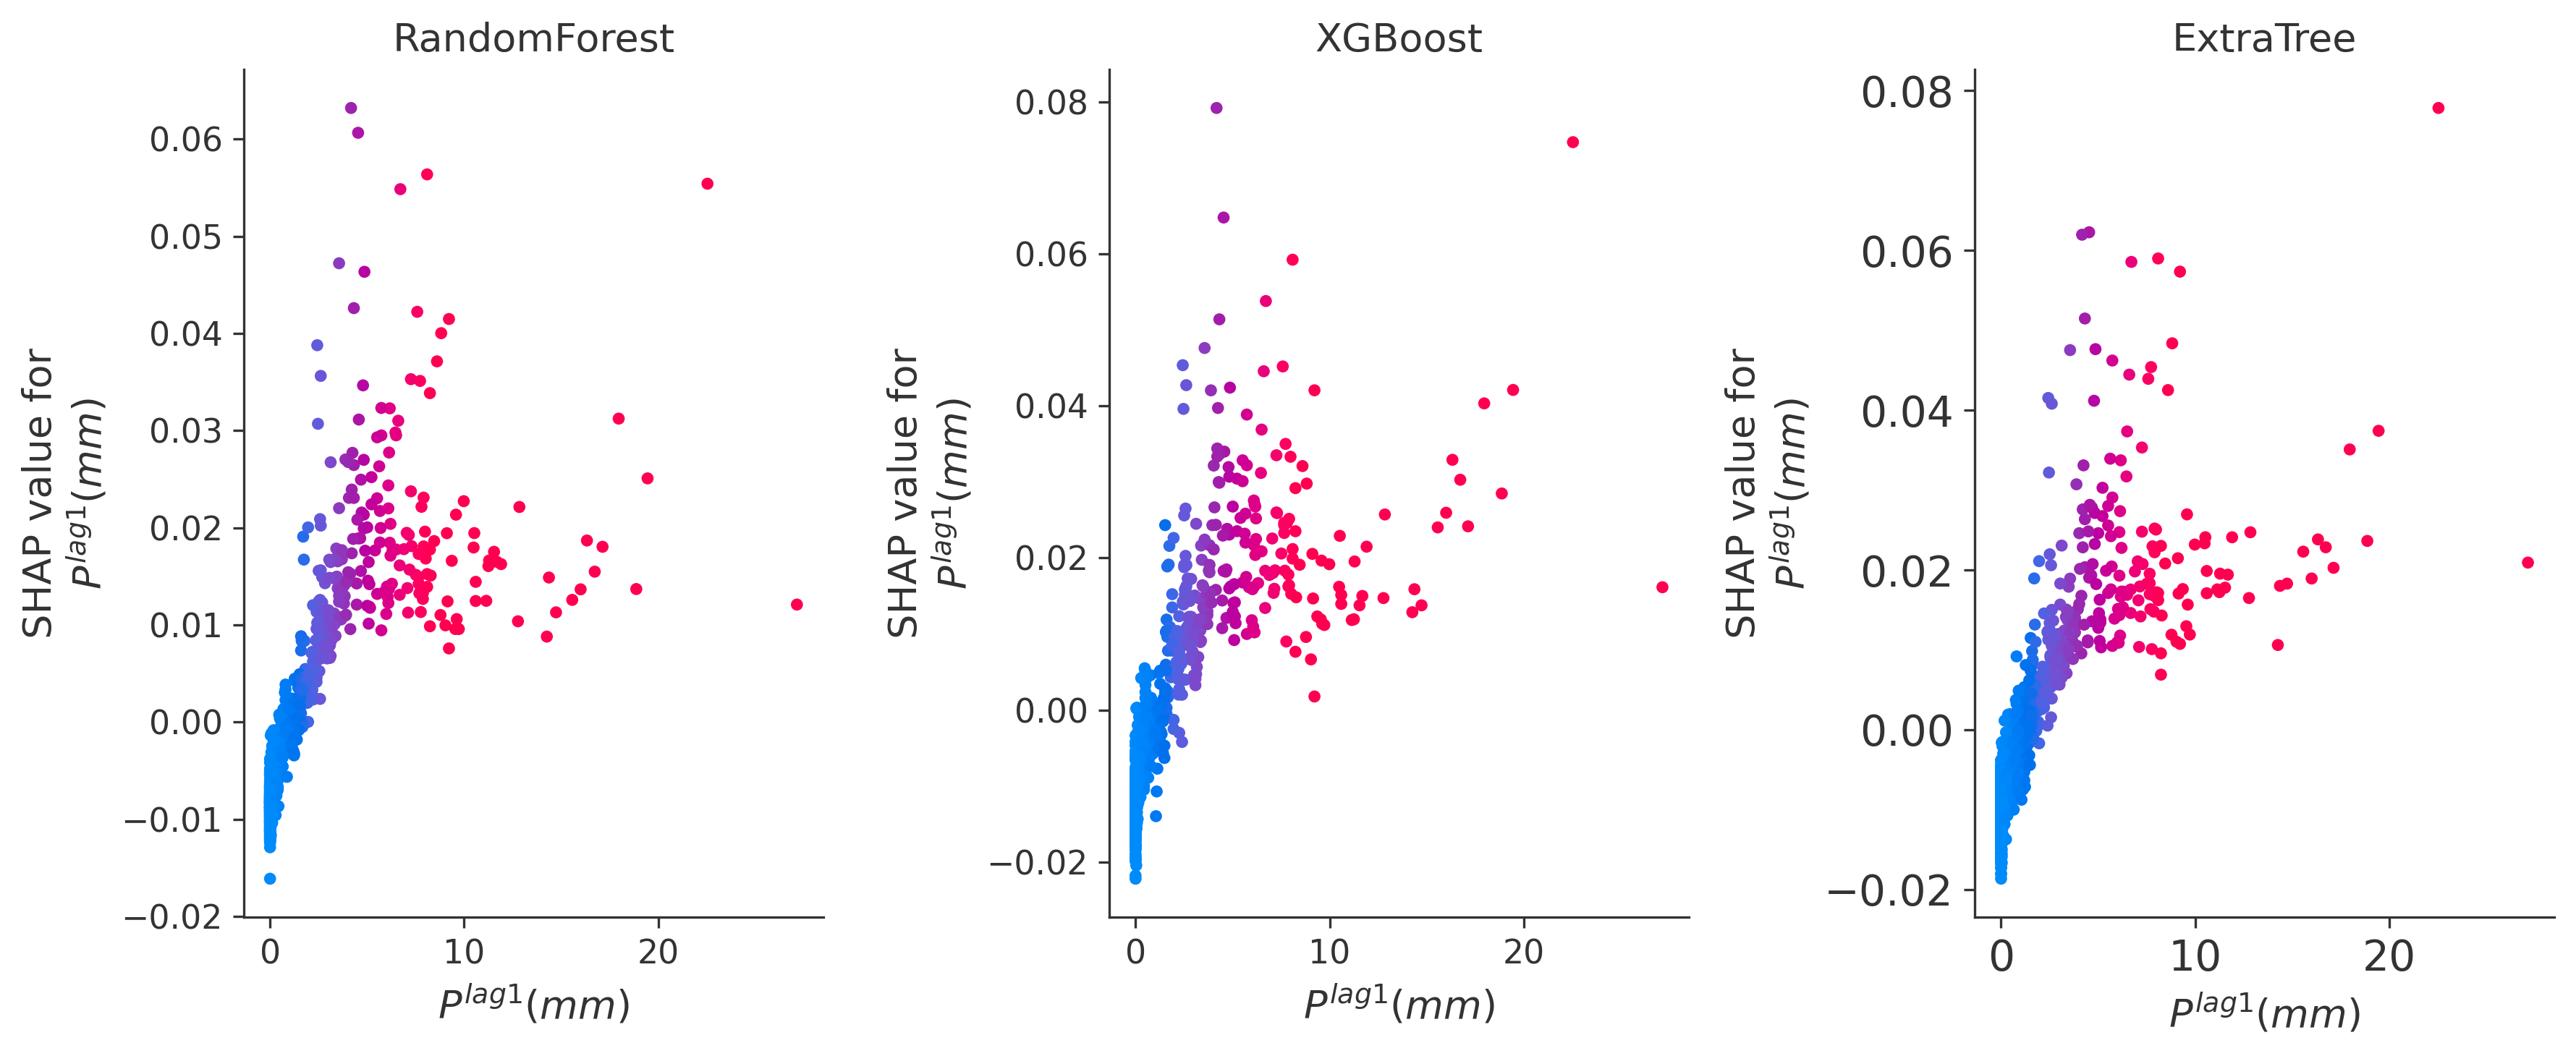

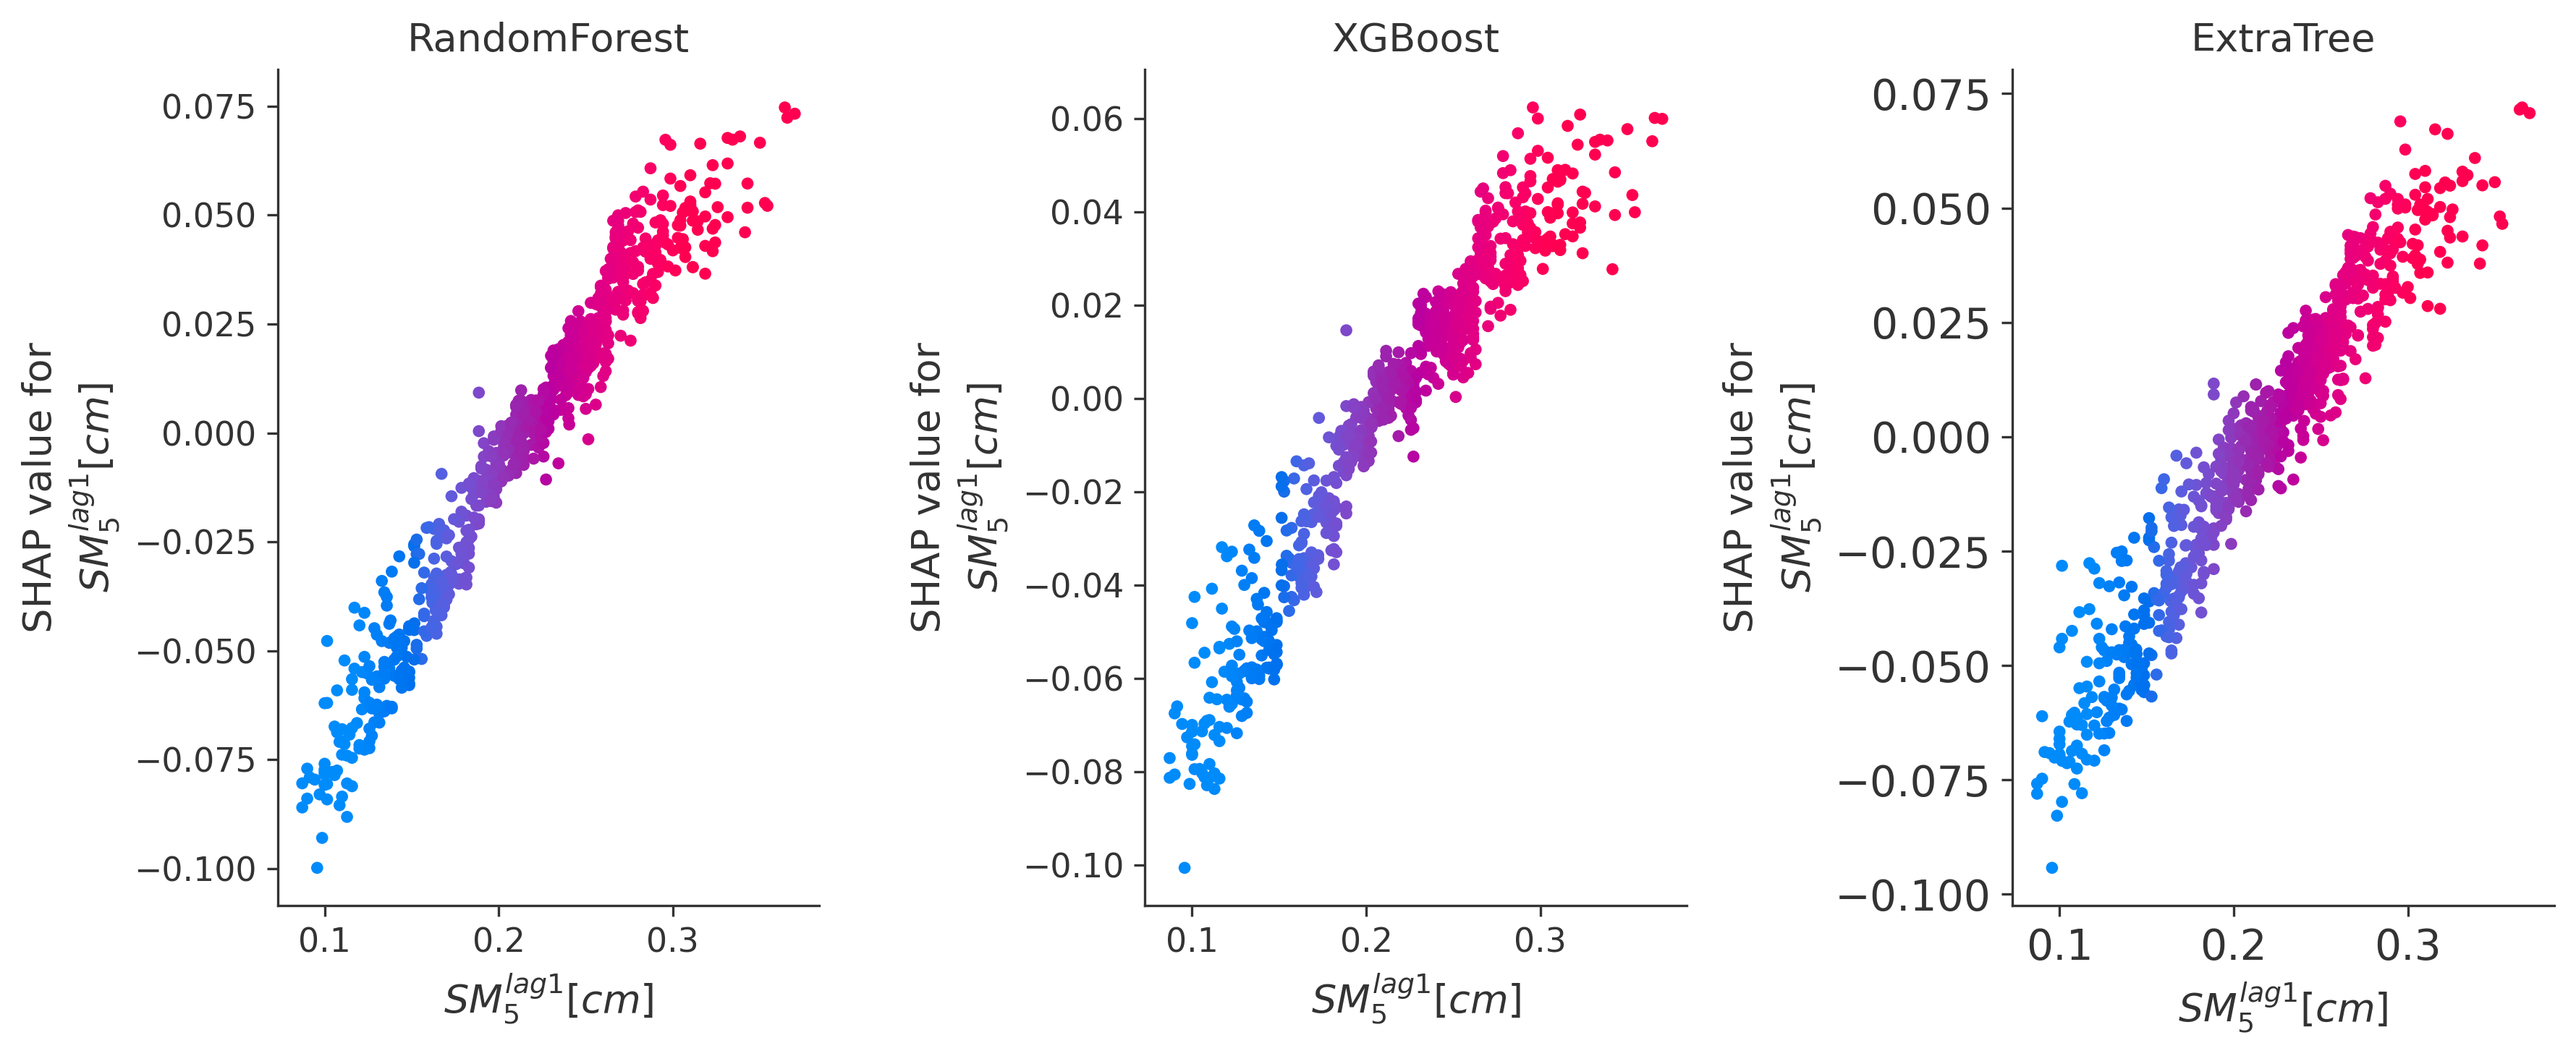

In [422]:
Importance_feat = ['$T_{max}$ [$^oC$]',
                   '$P [mm]$',
                   '$P^{lag1} (mm)$',
                   '$SM_{5}^{lag1}[cm]$']


for i in Importance_feat:
    fig, ax = plt.subplots(1, 3, figsize=(12, 5), dpi=300)
    for count, j in enumerate(keep):
        shap.dependence_plot(i, keep[j], X, Features, ax=ax[count], show=False,
                             interaction_index=i, title=j)
        #ax[count].title(j, fontsize=14)
        plt.tick_params(labelsize=14)
        # plt.ylabel(labelsize=16)
        plt.tight_layout(pad=1.2)
        plt.savefig(path_to_save+r'/Feature Interaction_' + str(i)+'.jpg',
                    format='jpeg', dpi=300, bbox_inches='tight')


## Reload other call other sheets and repeat. analyse other station


$T_{max}$ [$^oC$]
$T_{min}$ [$^oC$]
$P [mm]$
$P^{lag1} (mm)$
$P^{lag2} (mm)$
$SM_{5}^{lag1}[cm]$
$SM_{5}^{lag2}[cm]$
